In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [24]:
df=pd.read_csv("/kaggle/input/deodorant-dataset-top-brands-in-india/deodorant_dataset.csv")

In [25]:
df.sample()

,Brand Name,Product Name,Category,Fragrance Type,Volume (ml),Price (INR),Long-lasting (hours),Alcohol-Free,Skin-Friendly,Anti-Perspirant,...,Number of Reviews,Manufacturing Date,Expiry Date,Country of Origin,Packaging Type,Shelf Life (Months),Sales in Last Month (Units),Online Availability,Discount (%),Retailer Name
3448,Denver Deo for Men,Variant 14,Unisex,Woody,200,570,4,No,No,Yes,...,3862,2031-06-11,2033-06-10,India,Stick,25,944,No,35,Amazon


In [26]:
df.columns

Index(['Brand Name', 'Product Name', 'Category', 'Fragrance Type',
       'Volume (ml)', 'Price (INR)', 'Long-lasting (hours)', 'Alcohol-Free',
       'Skin-Friendly', 'Anti-Perspirant', 'Customer Rating',
       'Number of Reviews', 'Manufacturing Date', 'Expiry Date',
       'Country of Origin', 'Packaging Type', 'Shelf Life (Months)',
       'Sales in Last Month (Units)', 'Online Availability', 'Discount (%)',
       'Retailer Name'],
      dtype='object')

In [28]:
df.nunique()

Brand Name                         8
Product Name                      50
Category                           3
Fragrance Type                     8
Volume (ml)                        4
Price (INR)                      551
Long-lasting (hours)              21
Alcohol-Free                       2
Skin-Friendly                      2
Anti-Perspirant                    2
Customer Rating                   26
Number of Reviews               4325
Manufacturing Date             10000
Expiry Date                    10000
Country of Origin                  1
Packaging Type                     3
Shelf Life (Months)               25
Sales in Last Month (Units)     6327
Online Availability                2
Discount (%)                      51
Retailer Name                      5
dtype: int64

In [29]:
df.isnull().sum()

Brand Name                     0
Product Name                   0
Category                       0
Fragrance Type                 0
Volume (ml)                    0
Price (INR)                    0
Long-lasting (hours)           0
Alcohol-Free                   0
Skin-Friendly                  0
Anti-Perspirant                0
Customer Rating                0
Number of Reviews              0
Manufacturing Date             0
Expiry Date                    0
Country of Origin              0
Packaging Type                 0
Shelf Life (Months)            0
Sales in Last Month (Units)    0
Online Availability            0
Discount (%)                   0
Retailer Name                  0
dtype: int64

In [30]:
label_encoder=LabelEncoder()
label_dic={}
df2 = df.copy()  # Define df2 as a copy of df

for i in df.columns:
    
    if df[i].dtype=="object":
        df2[i]=label_encoder.fit_transform(df[i])
        label_dic[f"{i}"]=label_encoder

In [33]:
df["Manufacturing Date"]=pd.to_datetime(df["Manufacturing Date"])
df["Expiry Date"]=pd.to_datetime(df["Expiry Date"])

df2["Year_manuf"]=df["Manufacturing Date"].dt.year
df2["month_manuf"]=df["Manufacturing Date"].dt.month
df2["date_manuf"]=df["Manufacturing Date"].dt.day

df2["Year_exp"]=df["Expiry Date"].dt.year
df2["month_exp"]=df["Expiry Date"].dt.month
df2["date_exp"]=df["Expiry Date"].dt.day

In [35]:
df2=df2.drop(columns=["Manufacturing Date","Expiry Date"])
df2

,Brand Name,Product Name,Category,Fragrance Type,Volume (ml),Price (INR),Long-lasting (hours),Alcohol-Free,Skin-Friendly,Anti-Perspirant,...,Sales in Last Month (Units),Online Availability,Discount (%),Retailer Name,Year_manuf,month_manuf,date_manuf,Year_exp,month_exp,date_exp
0,4,21,0,3,200,265,15,0,0,1,...,8623,1,20,4,2022,1,1,2024,1,1
1,2,13,0,1,100,515,4,1,0,1,...,3616,0,36,1,2022,1,2,2024,1,2
2,5,22,2,5,150,249,8,1,0,1,...,2425,0,11,1,2022,1,3,2024,1,3
3,4,23,1,7,250,487,12,1,1,0,...,7509,0,15,2,2022,1,4,2024,1,4
4,7,2,1,1,250,317,20,1,1,1,...,3803,1,47,2,2022,1,5,2024,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,9,1,0,200,231,8,1,0,0,...,5412,0,21,1,2049,5,14,2051,5,14
9996,1,48,2,3,150,151,7,0,0,0,...,3831,1,39,0,2049,5,15,2051,5,15
9997,0,44,0,3,200,216,23,1,1,0,...,2005,1,17,2,2049,5,16,2051,5,16
9998,3,26,1,3,100,399,23,0,0,0,...,9630,1,2,4,2049,5,17,2051,5,17


In [36]:
X=df2.drop(columns=["Retailer Name"])
Y=df2["Retailer Name"]

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [40]:
Y_train.unique()

array([3, 2, 4, 0, 1])

In [42]:
random_classif=RandomForestClassifier()
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

0.1975

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

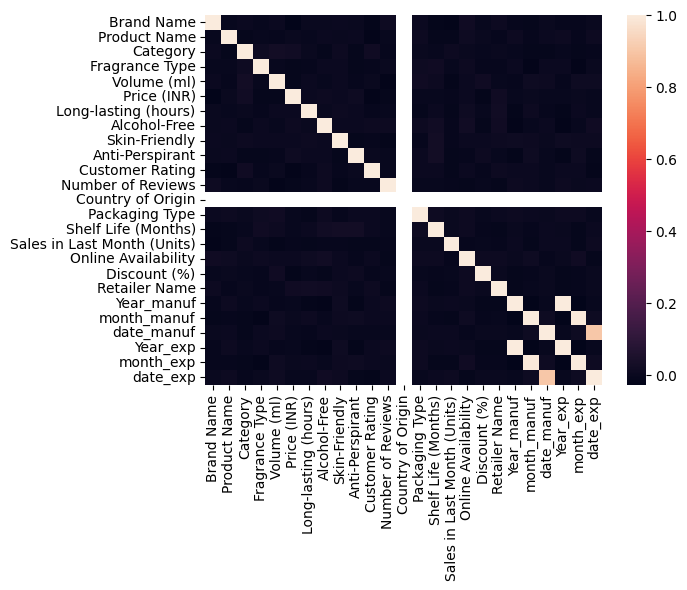

In [44]:
sns.heatmap(df2.corr())

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset
import torch

# Convert tabular data to a Hugging Face Dataset
train_data = Dataset.from_pandas(X_train.assign(label=Y_train))
test_data = Dataset.from_pandas(X_test.assign(label=Y_test))

# Load a pretrained transformer (modify based on your task)


In [ ]:
train_data


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(set(Y_train)))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="steps",  # ✅ Change this from `evaluation_strategy` to `eval_strategy`
    eval_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    load_best_model_at_end=True
)
# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)
# Train the model
trainer.train()


In [ ]:
# Evaluate model on the test dataset
eval_results = trainer.evaluate(test_data)

# Print evaluation results
print(eval_results)
